# MC886 - Aprendizado de Máquina

## Projeto Final - Objetivos de Desenvolvimento Sustentável - Educação de Qualidade

### Alunos:
André Soranzzo Mota RA: 166404
Diego André Pedro RA: 166542
Gabriel Akahoshi Collado RA: 197141
Rebecca Moreira Messias RA: 186416

### 1. Introdução
Os Objetivos de Desenvolvimento Sustentável são um apelo global à ação para acabar com a pobreza, proteger o meio ambiente e o clima e garantir que as pessoas, em todos os lugares, possam desfrutar de paz e de prosperidade. Estes são os objetivos para os quais as Nações Unidas estão contribuindo a fim de que possamos atingir a Agenda 2030 no Brasil. O quarto objetivo é sobre a Educação de Qualidade. Esse objetivo visa garantir o acesso à educação inclusiva, de qualidade e equitativa, e promover oportunidades de aprendizagem ao longo da vida para todos.

No decorrer dos anos o governo realiza censos e disponibiliza os resultados para consulta. A forma que esses dados são disponibilizados não é de forma acessível e que todos consigam interpretar facilmente. Normalmente essas informações são encontradas em planilhas e as pessoas que tiverem interesse precisam analisar para tirar suas conclusões. Outro ponto é que os dados não são centralizados. Diferente métricas e taxas estão distribuídas em planilhas diferentes e em diferentes plataformas do governo. Isso acaba tornando o processo dificultoso, além de já ser difícil a compreensão e interpretação dessas informações, o que acaba não sendo acessível a todos.

O prazo dos Objetivos de Desenvolvimento Sustentável é 2030 e em 2022 será ano de eleições no Brasil. Considerando esses dois pontos, o objetivo desse projeto é classificar quais governos investiram e conseguiram atingir boas taxas na educação nos últimos anos. Também objeticamos prever quais partidos tenderão a investir mais em educação nos próximos anos a fim de conscientizar e ajudar os eleitores a escolherem seus candidatos e votar conscientemente.

### 2. Ideia do Projeto e Conjunto de Dados

Para este projeto, nós decidimos desenvolver uma solução a fim de melhor a qualidade da educação no Brasil. Para determinar os fatores que compõe essa qualidade, nós pesquisamos dados do IBGE para as medidas quantitativas, e nisso encontramos uma infinidade de valores.
Para lidar com os valores de medição da educação, optamos por dividir os dados em grupos, baseado em sua semelhança, que constituiria na seguinte pontuação:

- **Governança:** grupo formado por valores que medem a competência do governo em prover recursos e tomar decisões voltadas para a melhoria geral do sistema educacional brasileiro. \
- **Inserção Populacional:** Valores que abrangem o envolvimento populacional e intenção de aprendizagem direta no ambiente educacional, incluindo evasão escolar do aluno e frequência das aulas. \
- **Capacitação Educacional:** Neste grupo colocamos valores que medem a eficácia do sistema educacional atual, em termos de combate ao analfabetismo e formação da população.

O cálculo dos scores baseou-se na escala dos próprios valores. Uma vez que nossos valores usados foram todos em formato de porcentagem, a soma desses valores daria uma pontuação cumulativa ao longo dos anos avaliados (de 2000 a 2021), contribuindo positiva ou negativamente com base no fato de ter sido uma melhoria ou não para o sistema educacional. \
A princípio, decidimos apontar nossa solução para medir a conclusão do ensino fundamental e médio e a taxa de analfabetismo de adolescentes e adultos, pois são pontos retratados no artigo da ONU a respeito do objetivo do nosso projeto.

### 3. Plano de Desenvolvimento
Como primeiro objetivo, decidimos apresentar uma resolução para a medição de completude dos graus primários e secundários de infantes e as taxas de analfabetismo de jovens e adultos. Para isso utilizamos primariamente o grupo de valores contidos em Capacitação Educacional.

Para efetivar um impacto real, nosso grupo decidiu encontrar a melhor combinação partidária que demonstrou a melhor taxa de melhoria na nota do grupo em seu período de vigência. Utilizamos inicialmente a abordagem de regressão para predizermos esta efetividade ao longo dos anos, até 2021.

Com base na composição partidária de cada ano, incluindo o ministro da educação, foi possível reter o efeito inciso da mesma em cada nota individual por ano. Tendo essa informação acessível e disponibilizada ao público o efeito estimado seria a diminuição do efeito de "fake news" sobre decisões eleitorais pautadas em propostas de educação, uma vez que a fonte de dados é conhecida e livre de influências partidárias (IBGE).

### 4. Implementação

#### 4.1 Bibliotecas utilizadas
As bibliotecas utilizadas foram:
- **numpy**: manipular arrays
- **pandas**: manipular os dados
- **matplotlib**: plotar os gráficos
- **math**: cálculo de operações matemáticas

In [20]:
import numpy as np
import pandas as pd
import math

Todos os dados pesquisados foram inseridos na tabela *features.csv* e abreviações e siglas foram utilizadas nos nomes das colunas. Segue abaixo a legenda para cada sigla:
- Partido_Pres = Partido do Presidente
- Min_Educacao = Ministro da Educação
- Partido_Min = Partido do Ministro da Educação
- Pop_Total = População Total
- TFEB = Taxa de Frequência Escolar Bruta. \
Exemplo 1: TFEB_0_3 = Taxa de Frequência Escolar Bruta de 0 a 3 anos. \
Exemplo 2: TFEB_25_Mais = Taxa de Frequência Escolar Bruta de 25 anos ou mais.
- NI25M = Nível de Instrução de pessoas com 25 anos ou mais \
- Sem = Sem instrução
- En_Fun = Ensino Fundamental
- En_Med = Ensino Médio
- En_Sup = Ensino Superior
- In = Incompleto
- Com = Completo
- TA15M = Taxa de Analfabetismo de pessoas com 15 anos ou mais
- Ger = Geral
- Urb = Urbano
- Rur = Rural
- H = Homem
- M = Mulher
- Bra = Brancos
- Pre_Par = Pretos ou pardos
- GI = Grupos de idade \
Exemplo 1: TA15M_GI_15_19 = Taxa de Analfabetismo de pessoas do grupo de idade entre 15 a 19 anos. \
Exemplo 2: TA15M_GI_65_M = Taxa de Analfabetismo de pessoas do grupo de idade de 65 anos ou mais.
- IPDPE = Investimento Público Direto por Estudante
- TodosNiveis = Todos os níveis de ensino
- EB = Educação Básica
- EI = Educação Infantil \
Exemplo 1: IPDPE_1_4_Serie = Investimento Público Direto por Estudante de 1ª a 4ª Séries ou Anos Iniciais
- IPDPE_Prop_ES_Sobre_EB = Proporção da Educação Superior sobre a Educação Básica (Estudante)
- TRE = Taxa de Rendimento Escolar
- TAP = Taxa de Aprovação
- TRE = Taxa de Reprovação
- TAB = Taxa de Abandono

In [21]:
df = pd.read_csv('features.csv', encoding='utf-8')
df

,Ano,Presidente,Partido_Pres,Min_Educacao,Partido_Min,Pop_Total,Desemprego,TFEB_Total,TFEB_0_3,TFEB_4_5,...,IPDPE_5_8_Series,IPDPE_EM,IPDPE_ES,IPDPE_Prop_ES_Sobre_EB,TRE_TAP_EF,TRE_TAP_EM,TRE_TRE_EF,TRE_TRE_EM,TRE_TAB_EF,TRE_TAB_EM
0,2000,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2367.0,2274.0,25845.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2579.0,2557.0,25539.0,10.5,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2484.0,1723.0,23653.0,9.8,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,Fernando Henrique Cardoso,PSDB,Cristovam Buarque,PT,NaN,NaN,NaN,NaN,NaN,...,2395.0,1911.0,20669.0,8.6,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Luiz Inácio Lula da Silva,PT,Tarso Genro,PT,NaN,NaN,31.7,13.4,61.5,...,2670.0,1745.0,19567.0,7.6,78.7,73.3,13.0,10.4,8.3,16.0
5,2005,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,31.2,13.0,62.8,...,2880.0,1850.0,21083.0,7.7,79.5,73.2,13.0,11.5,7.5,15.3
6,2006,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,31.2,15.4,67.5,...,3785.0,2571.0,21826.0,6.6,NaN,NaN,NaN,NaN,NaN,NaN
7,2007,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,30.7,17.0,70.0,...,4301.0,3119.0,23062.0,5.9,83.1,74.1,12.1,12.7,4.8,13.2
8,2008,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,30.2,18.1,72.7,...,5007.0,3609.0,21317.0,4.8,83.8,74.9,11.8,12.3,4.4,12.8
9,2009,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,29.8,18.4,74.8,...,5530.0,3805.0,23941.0,4.9,85.2,75.9,11.1,12.6,3.7,11.5


In [22]:
df['TDsp'] = (df['Desemprego']/df['Pop_Total']) * 100
df = df.drop(columns=['Desemprego', 'Pop_Total'])
old_df = df.copy()

In [23]:
# Inserção populacional
print(df.columns[5:14])

# Capacitação educacional
print(df.columns[14:35].union(df.columns[43:49]))

# Governança
print(df.columns[35:43].union(df.columns[49:]))

Index(['TFEB_Total', 'TFEB_0_3', 'TFEB_4_5', 'TFEB_6_10', 'TFEB_11_14',
       'TFEB_6_14', 'TFEB_15_17', 'TFEB_18_24', 'TFEB_25_Mais'],
      dtype='object')
Index(['NI25M_En_Fun_Com', 'NI25M_En_Fun_In', 'NI25M_En_Med_Com',
       'NI25M_En_Med_In', 'NI25M_En_Sup_Com', 'NI25M_En_Sup_In ', 'NI25M_Sem',
       'TA15M_Bra', 'TA15M_GI_15_19', 'TA15M_GI_20_24', 'TA15M_GI_25_34',
       'TA15M_GI_35_44', 'TA15M_GI_45_54', 'TA15M_GI_55_64', 'TA15M_GI_65_M',
       'TA15M_Ger', 'TA15M_H', 'TA15M_M', 'TA15M_Pre_Par', 'TA15M_Rur',
       'TA15M_Urb', 'TRE_TAB_EF', 'TRE_TAB_EM', 'TRE_TAP_EF', 'TRE_TAP_EM',
       'TRE_TRE_EF', 'TRE_TRE_EM'],
      dtype='object')
Index(['IPDPE_1_4_Serie', 'IPDPE_5_8_Series', 'IPDPE_EB', 'IPDPE_EI',
       'IPDPE_EM', 'IPDPE_ES', 'IPDPE_Prop_ES_Sobre_EB', 'IPDPE_TodosNiveis',
       'TDsp'],
      dtype='object')


In [24]:
IPDPE = 0.005
TRE = 1
w = {
    'TDsp': -10,
    'TFEB_Total': 1,
    'TFEB_0_3': 1,
    'TFEB_4_5': 1,
    'TFEB_6_10': 1,
    'TFEB_11_14': 1,
    'TFEB_6_14': 1,
    'TFEB_15_17': 1,
    'TFEB_18_24': 1,
    'TFEB_25_Mais': 1,
    'NI25M_Sem': -1,
    'NI25M_En_Fun_In': -1,
    'NI25M_En_Fun_Com': 1,
    'NI25M_En_Med_In': -1,
    'NI25M_En_Med_Com': 1,
    'NI25M_En_Sup_In ': -1,
    'NI25M_En_Sup_Com': 1,
    'TA15M_Ger': -1,
    'TA15M_Urb': -1,
    'TA15M_Rur': -1,
    'TA15M_H': -1,
    'TA15M_M': -1,
    'TA15M_Bra': -1,
    'TA15M_Pre_Par': -1,
    'TA15M_GI_15_19': -1,
    'TA15M_GI_20_24': -1,
    'TA15M_GI_25_34': -1,
    'TA15M_GI_35_44': -1,
    'TA15M_GI_45_54': -1,
    'TA15M_GI_55_64': -1,
    'TA15M_GI_65_M': -1,
    'IPDPE_TodosNiveis': IPDPE,
    'IPDPE_EB': IPDPE,
    'IPDPE_EI': IPDPE,
    'IPDPE_1_4_Serie': IPDPE,
    'IPDPE_5_8_Series': IPDPE,
    'IPDPE_EM': IPDPE,
    'IPDPE_ES': IPDPE,
    'IPDPE_Prop_ES_Sobre_EB': IPDPE,
    'TRE_TAP_EF': TRE,
    'TRE_TAP_EM': TRE,
    'TRE_TRE_EF': -TRE,
    'TRE_TRE_EM': -TRE,
    'TRE_TAB_EF': -TRE,
    'TRE_TAB_EM': -TRE,
}

In [25]:
means = df.mean(axis = 0, skipna = True)
means

Ano                        2010.000000
TFEB_Total                   28.806667
TFEB_0_3                     22.906667
TFEB_4_5                     78.693333
TFEB_6_10                    98.180000
TFEB_11_14                   97.953333
TFEB_6_14                    98.060000
TFEB_15_17                   84.680000
TFEB_18_24                   31.033333
TFEB_25_Mais                  4.720000
NI25M_Sem                     7.500000
NI25M_En_Fun_In              33.950000
NI25M_En_Fun_Com              8.800000
NI25M_En_Med_In               4.150000
NI25M_En_Med_Com             26.550000
NI25M_En_Sup_In               3.500000
NI25M_En_Sup_Com             15.500000
TA15M_Ger                     8.840000
TA15M_Urb                     6.646667
TA15M_Rur                    21.186667
TA15M_H                       9.080000
TA15M_M                       8.600000
TA15M_Bra                     5.360000
TA15M_Pre_Par                12.120000
TA15M_GI_15_19                1.286667
TA15M_GI_20_24           

In [26]:
from itertools import zip_longest

def nearest_non_zero(lst, idx):
    if lst[idx] > 0:
        return lst[idx]
    before, after = lst[:idx], lst[idx+1:]
    for b_val, a_val in zip_longest(reversed(before), after, fillvalue=0):

        if b_val > 0:
            return b_val
        if a_val > 0:
            return a_val
    else:
        return 0

In [27]:
nearest_non_zero(df['TFEB_Total'], 0)
for column in df:
    dfObj = df[column]
    line = dfObj.values
    if not isinstance(line[0], str):
        for i in range(line.size):
            if math.isnan(line[i]):
                line[i] = nearest_non_zero(line, i)

In [28]:
df

,Ano,Presidente,Partido_Pres,Min_Educacao,Partido_Min,TFEB_Total,TFEB_0_3,TFEB_4_5,TFEB_6_10,TFEB_11_14,...,IPDPE_EM,IPDPE_ES,IPDPE_Prop_ES_Sobre_EB,TRE_TAP_EF,TRE_TAP_EM,TRE_TRE_EF,TRE_TRE_EM,TRE_TAB_EF,TRE_TAB_EM,TDsp
0,2000,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,31.7,13.4,61.5,95.9,96.4,...,2274.0,25845.0,11.0,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
1,2001,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,31.7,13.4,61.5,95.9,96.4,...,2557.0,25539.0,10.5,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
2,2002,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,31.7,13.4,61.5,95.9,96.4,...,1723.0,23653.0,9.8,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
3,2003,Fernando Henrique Cardoso,PSDB,Cristovam Buarque,PT,31.7,13.4,61.5,95.9,96.4,...,1911.0,20669.0,8.6,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
4,2004,Luiz Inácio Lula da Silva,PT,Tarso Genro,PT,31.7,13.4,61.5,95.9,96.4,...,1745.0,19567.0,7.6,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
5,2005,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,31.2,13.0,62.8,96.4,96.7,...,1850.0,21083.0,7.7,79.5,73.2,13.0,11.5,7.5,15.3,3.332829
6,2006,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,31.2,15.4,67.5,96.9,96.9,...,2571.0,21826.0,6.6,79.5,73.2,13.0,11.5,7.5,15.3,3.332829
7,2007,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,30.7,17.0,70.0,97.0,97.0,...,3119.0,23062.0,5.9,83.1,74.1,12.1,12.7,4.8,13.2,3.332829
8,2008,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,30.2,18.1,72.7,97.6,97.3,...,3609.0,21317.0,4.8,83.8,74.9,11.8,12.3,4.4,12.8,3.332829
9,2009,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,29.8,18.4,74.8,97.7,97.5,...,3805.0,23941.0,4.9,85.2,75.9,11.1,12.6,3.7,11.5,3.332829


## II - Plano de Desenvolvimento

Para efetivar um impacto real na educação, nosso grupo decidiu encontrar a melhor combinação partidária que demonstrasse a melhor taxa de melhoria nas notas dos grupos em seu período de vigência. Utilizamos inicialmente a abordagem de regressão para predizermos esta efetividade ao longo dos anos, até 2021.

Com base na composição partidária de cada ano, incluindo o ministro da educação, foi possível reter o efeito inciso da mesma em cada nota individual por ano. Tendo essa informação acessível e disponibilizada ao público o efeito estimado seria a diminuição da influência de "fake news" sobre decisões eleitorais pautadas em propostas de educação, uma vez que a fonte de dados é conhecida e livre de influências partidárias (IBGE).

Como primeiro objetivo, decidimos apresentar uma resolução para a medição de completude dos graus primário e secundário de infantes e as taxas de analfabetismo de jovens e adultos. Para isso utilizamos primariamente o grupo de valores contidos em Capacitação Educacional.

In [29]:
def score(line):
    score = 0
    for column, val in zip(line.index, line):
        if not isinstance(val, str):
            if math.isnan(val):
                val = means[column]
            w_val = w[column] * val
            score += w_val
    return score

In [30]:
score_governanca = []
score_insercao_pop = []
score_cap_educacional = []

for i in range(len(df)):
    line = df.iloc[i]
    
    insercao_pop = line[5:14]
    cap_educacional = line[14:35]
    governanca = line[35:]
    
    score_governanca.append(score(governanca))
    score_insercao_pop.append(score(insercao_pop))
    score_cap_educacional.append(score(cap_educacional))
    
    print(f'Governança: {score(governanca):.2f}, Inserção Pop.: {score(insercao_pop):.2f}, \
Cap. Educacional: {score(cap_educacional):.2f}')

Governança: 275.56, Inserção Pop.: 514.60, Cap. Educacional: -185.50
Governança: 275.66, Inserção Pop.: 514.60, Cap. Educacional: -185.50
Governança: 262.45, Inserção Pop.: 514.60, Cap. Educacional: -185.50
Governança: 248.92, Inserção Pop.: 514.60, Cap. Educacional: -185.50
Governança: 247.66, Inserção Pop.: 514.60, Cap. Educacional: -185.50
Governança: 259.66, Inserção Pop.: 515.50, Cap. Educacional: -178.90
Governança: 280.63, Inserção Pop.: 524.20, Cap. Educacional: -168.10
Governança: 313.30, Inserção Pop.: 527.10, Cap. Educacional: -161.20
Governança: 323.69, Inserção Pop.: 533.20, Cap. Educacional: -157.80
Governança: 352.90, Inserção Pop.: 536.40, Cap. Educacional: -152.70
Governança: 389.41, Inserção Pop.: 536.40, Cap. Educacional: -152.70
Governança: 417.62, Inserção Pop.: 538.50, Cap. Educacional: -135.00
Governança: 426.23, Inserção Pop.: 539.50, Cap. Educacional: -135.00
Governança: 463.39, Inserção Pop.: 546.20, Cap. Educacional: -131.80
Governança: 459.77, Inserção Pop.:

(21,)
21


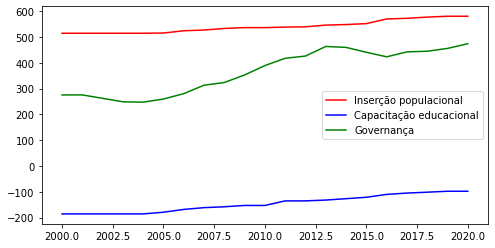

In [31]:
import matplotlib.pyplot as plt
t = np.arange(2000, 2021, 1)
print(t.shape)
print(len(score_insercao_pop))

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(t, score_insercao_pop, 'r', label='Inserção populacional')
ax.plot(t, score_cap_educacional, 'b', label='Capacitação educacional')
ax.plot(t, score_governanca, 'g', label='Governança')

legend = ax.legend(loc='best', shadow=False)
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def linear_reg(X, y_pred):
    model = LinearRegression().fit(X, y_pred)
    a = model.coef_[0]
    b = model.intercept_
    return (a, b, model)

def pol_reg(X, y_pred, degree):
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(X, y_pred)
    return polyreg

In [33]:
def plot_reg(score, label, degree=None):
    fig, ax = plt.subplots()
    model = None

    ax.plot(t, score, 'r', label=label)
    X = np.arange(2000, 2021, 1)
    X_pred = np.linspace((1,2000), (21,2020), 21)
    
    X_future = np.arange(2000, 2031, 1)
    X_pred_future = np.linspace((1,2000), (31,2030), 31)
    if degree:
        model = pol_reg(X_pred, score, degree)
        X_input = X_future.reshape(-1, 1)
        
        ax.plot(X_input, model.predict(X_pred_future), 'g--', label='Regressão polinomial')
    else:
        a, b, model = linear_reg(X_pred, score)
        X_input = X_future.reshape(-1, 1)
        
        ax.plot(X_input, model.predict(X_pred_future), 'g--', label='Regressão linear')

    legend = ax.legend(loc='best', shadow=False)

    plt.show()
    return model

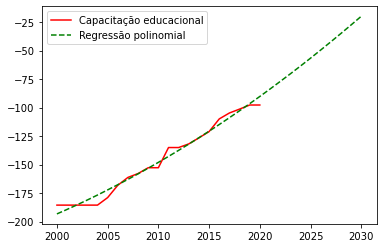

-19.84375


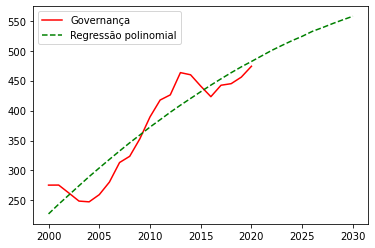

557.75


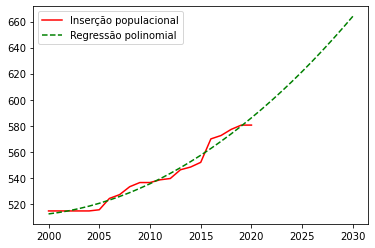

664.0625


In [34]:
model = plot_reg(score_cap_educacional, 'Capacitação educacional', 2)
print(model.predict(np.array([31, 2030]).reshape(1, -1))[0])

model = plot_reg(score_governanca, 'Governança', 2)
print(model.predict(np.array([31, 2030]).reshape(1, -1))[0])

model = plot_reg(score_insercao_pop, 'Inserção populacional', 2)
print(model.predict(np.array([31, 2030]).reshape(1, -1))[0])

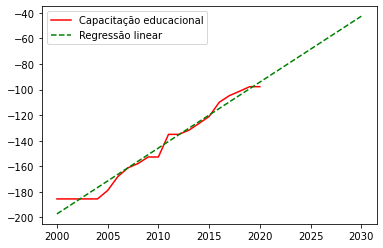

-42.61515151515141


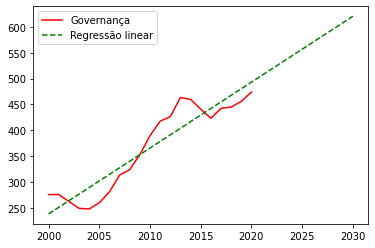

620.5861793506465


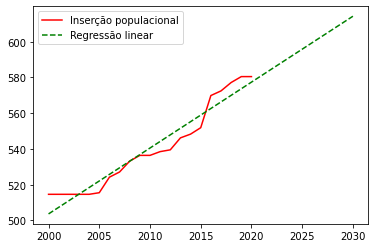

614.2909090909088


In [35]:
model = plot_reg(score_cap_educacional, 'Capacitação educacional')
print(model.predict(np.array([31, 2030]).reshape(1, -1))[0])

model = plot_reg(score_governanca, 'Governança')
print(model.predict(np.array([31, 2030]).reshape(1, -1))[0])

model = plot_reg(score_insercao_pop, 'Inserção populacional')
print(model.predict(np.array([31, 2030]).reshape(1, -1))[0])